<a href="https://colab.research.google.com/github/jmend01/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/Jonathan_Mendoza_LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [0]:
!wget https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip

In [0]:
!unzip LoanStats_2019Q1.csv.zip

In [0]:
!head LoanStats_2019Q1.csv

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
import pandas as pd
df = pd.read_csv('LoanStats_2019Q1.csv',skiprows = 1, skipfooter = 2, engine = 'python')
print(df.shape)
df.head()

In [0]:
df.isna().sum()

In [0]:
df[df.loan_amnt.isna()]

In [0]:
df.head().T

In [0]:
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150
df.head().T

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [0]:
df.describe(include = 'object')

In [0]:
df.grade.value_counts()

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [0]:
x = '12.5%'
float(x.strip('%'))


Apply the function to the `int_rate` column

In [0]:
df.int_rate.str.strip('%').astype(float).head()

In [0]:
def remove_pc(string):
  return float(string.strip('%'))

In [0]:
df['int_rate'] = df['int_rate'].apply(remove_pc)

### Clean `emp_title`

Look at top 20 titles

In [0]:
df.emp_title.value_counts().head(20)

In [0]:
df.emp_title.nunique()

How often is `emp_title` null?

In [0]:
df.emp_title.isna().sum()/df.shape[0]

Clean the title and handle missing values

In [0]:
import numpy as np

example = ['owner','Supervisor','Project manager',np.nan]

def clean_emp_title(x):
  if isinstance(x, str):
    return x.strip().title()
  else:
    return 'Missing'
  
# for ex in example:
#     print(clean_emp_title(ex))

[clean_emp_title(x) for x in example]

In [0]:
df['emp_title'] = df['emp_title'].apply(clean_emp_title)

In [0]:
df.emp_title.nunique()

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [0]:
df['emp_title'].str.contains('manager', case = False ).head()

In [0]:
df['emp_title_manager'] = df.emp_title.str.contains('Manager')
df['emp_title_manager'].value_counts()

In [0]:
df.groupby('emp_title_manager').int_rate.mean()

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [0]:
df['issue_d'].describe()

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format = True)

In [0]:
df['issue_d'].describe()

In [0]:
df['issue_d'].iloc [0:5].dt.year

In [0]:
df['issue_month'] = df['issue_d'].dt.month

In [0]:
df['issue_month'].value_counts()

In [0]:
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'])

In [0]:
df['days_since_earliest_cr_line'] = (df['issue_d']-df['earliest_cr_line']).dt.days

In [0]:
df['days_since_earliest_cr_line'].describe()

In [0]:
[col for col in df if col.endswith('_d')]

In [0]:
for col in ['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']:
  df[col] = pd.to_datetime(df[col])

In [0]:
df.describe(include = 'datetime')

# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

## Load in data

In [1]:
!wget https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip
!unzip LoanStats_2019Q1.csv.zip
!pip install pandas==0.23.4 #downgrade pandas version to enable crosstab for two binned features


     |████████████████████████████████| 8.9MB 5.0MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


## Import libraries, initialize and inspect dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('LoanStats_2019Q1.csv',skiprows = 1, skipfooter = 2, engine = 'python')
print(df.shape)
df.head()

(115675, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.19%,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,...,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000,12000,12000,36 months,16.40%,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,...,66.7,0,0,209488,51734,18500,54263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000,3000,3000,36 months,14.74%,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,Mar-2019,Current,n,NaN,NaN,medical,Medical expenses,327xx,FL,30.91,0,Jun-2004,0,24.0,NaN,16,0,20502,60.1%,25,f,2865.64,2865.64,202.33,202.33,...,71.4,0,0,69911,37816,11400,35811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,35000,35000,35000,36 months,15.57%,1223.08,C,C3,Store Manager,10+ years,RENT,122000.0,Verified,Mar-2019,Current,n,NaN,NaN,credit_card,Credit card refinancing,333xx,FL,22.00,1,Dec-2009,0,20.0,NaN,5,0,1441,24.4%,18,w,33459.43,33459.43,2446.76,2446.76,...,100.0,0,0,65640,24471,1600,59740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,5000,5000,5000,36 months,15.57%,174.73,C,C3,Area Manager,3 years,OWN,65000.0,Verified,Mar-2019,Current,n,NaN,NaN,house,Home buying,640xx,MO,16.28,1,Jul-2001,0,7.0,NaN,9,0,5604,64.4%,25,w,4778.86,4778.86,340.81,340.81,...,50.0,0,0,38190,29775,4400,29490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


## inspect 'term' column and change variable type

In [2]:
print(df.term.head())
df.term.value_counts()

0     60 months
1     36 months
2     36 months
3     36 months
4     36 months
Name: term, dtype: object


 36 months    78429
 60 months    37246
Name: term, dtype: int64

In [3]:
def remove_text(string):
  return int(string.strip(' months'))

df['term'] = df['term'].apply(remove_text)
df.term.head()

0    60
1    36
2    36
3    36
4    36
Name: term, dtype: int64

## Create new column

In [4]:
df.loan_status.value_counts()

Current               109176
Fully Paid              4730
Late (31-120 days)       795
In Grace Period          538
Late (16-30 days)        260
Charged Off              176
Name: loan_status, dtype: int64

In [5]:
df['loan_status_is_great'] = np.where((df['loan_status']== 'Current')|(df['loan_status']=='Fully Paid'), 1, 0)

df['loan_status_is_great'].value_counts()

1    113906
0      1769
Name: loan_status_is_great, dtype: int64

In [6]:
col_dates = [col for col in df if col.endswith('_d')]
for col in col_dates:
  df[col] = pd.to_datetime(df[col], infer_datetime_format = True)
  
df[col_dates].head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,2019-03-01,2019-06-01,2019-07-01,2019-06-01
1,2019-03-01,2019-05-01,2019-07-01,2019-06-01
2,2019-03-01,2019-05-01,2019-07-01,2019-06-01
3,2019-03-01,2019-06-01,2019-07-01,2019-06-01
4,2019-03-01,2019-05-01,2019-07-01,2019-06-01


In [7]:
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year

print(df['last_pymnt_d_month'].value_counts())
df['last_pymnt_d_year'].value_counts()

6.0    102101
5.0      9503
4.0      1581
3.0      1187
2.0       864
1.0       208
7.0         1
Name: last_pymnt_d_month, dtype: int64


2019.0    115445
Name: last_pymnt_d_year, dtype: int64

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

## Lending Club Stretch

### find and update columns with percent sign, convert to float, handle missing values

In [0]:
df.head()

In [0]:
df.shape

In [0]:
print(df.revol_util.isna().sum())
print(df.revol_util.value_counts())
df.revol_util.head()

In [8]:
df.revol_util.fillna(method = 'ffill', inplace = True)
df.revol_util.isna().sum()

0

In [0]:
def remove_perc(string):
  return float(string.strip('%'))

df['int_rate'] = df['int_rate'].apply(remove_perc)
df['revol_util'] = df['revol_util'].apply(remove_perc)

In [0]:
print(df.int_rate.head())
df.revol_util.head()

### Change emp_title to other if not in top 20

In [0]:
df.emp_title.value_counts()

In [0]:
def replacement(col1,col2,string,out):
  df[col1] = np.where((df[col2].str.contains(string, case = False) == True), out, df[col2])
  
  return df[col1]                    

In [0]:
# create new column 'emp_title2' and tidy up the column entries;
# it is best to do this before checking what the top 20 titles are

replacement('emp_title2','emp_title','mana','Manager')
replacement('emp_title2','emp_title2','mgr','Manager')
replacement('emp_title2','emp_title2','rn','RN')
replacement('emp_title2','emp_title2','registered nurse','RN')
replacement('emp_title2','emp_title2','nurse','Nurse')
replacement('emp_title2','emp_title2','vp','VP')
replacement('emp_title2','emp_title2','teacher','Educator')
replacement('emp_title2','emp_title2','educator','Educator')
replacement('emp_title2','emp_title2','vice president', 'VP')
replacement('emp_title2','emp_title2','presi', 'President')
replacement('emp_title2','emp_title2','driver','Driver')
replacement('emp_title2','emp_title2','supervisor','Supervisor')
replacement('emp_title2','emp_title2','owner','Owner')
replacement('emp_title2','emp_title2','admin','Administrative Support')
replacement('emp_title2','emp_title2','operator','Machine Operator')
replacement('emp_title2','emp_title2','ceo','CEO')
replacement('emp_title2','emp_title2','underwriter','Underwriter')
replacement('emp_title2','emp_title2','director','Director')
replacement('emp_title2','emp_title2','tech','Technician')
replacement('emp_title2','emp_title2','sales','Sales')
replacement('emp_title2','emp_title2','analyst','Analyst')
replacement('emp_title2','emp_title2','specialist','Specialist')
replacement('emp_title2','emp_title2','labor','Laborer')
replacement('emp_title2','emp_title2','maint','Maintenance')
replacement('emp_title2','emp_title2','assistant','Assistant')
replacement('emp_title2','emp_title2','qa','Quality Assurance')
replacement('emp_title2','emp_title2','quality','Quality Assurance')
replacement('emp_title2','emp_title2','data','Data Scientist')
replacement('emp_title2','emp_title2','coor','Coordinator')
replacement('emp_title2','emp_title2','mech','Mechanic')
replacement('emp_title2','emp_title2','sched','Scheduler')
replacement('emp_title2','emp_title2','secu','Security')
replacement('emp_title2','emp_title2','physician','Physician')
replacement('emp_title2','emp_title2','oper','Operations')
replacement('emp_title2','emp_title2','customer','Customer Service')
replacement('emp_title2','emp_title2','represent','Customer Service')
replacement('emp_title2','emp_title2','publish','Publisher')
replacement('emp_title2','emp_title2','consul','Consultant')
replacement('emp_title2','emp_title2','assoc','Associate')
replacement('emp_title2','emp_title2','human','HR');

In [12]:
top_twenty = df.emp_title2.value_counts().index.tolist()[:20]
print(top_twenty)

top_fifty = df.emp_title2.value_counts().index.tolist()[:50]

['Manager', 'Technician', 'Director', 'Educator', 'RN', 'Supervisor', 'Driver', 'Specialist', 'Sales', 'Operations', 'Administrative Support', 'Analyst', 'Assistant', 'Coordinator', 'VP', 'Customer Service', 'Nurse', 'Associate', 'Owner', 'Consultant']


In [0]:
df['emp_title2'] = np.where(df['emp_title2'].isin(top_fifty), df['emp_title2'],'Other')

In [0]:
df['emp_title2'].value_counts()

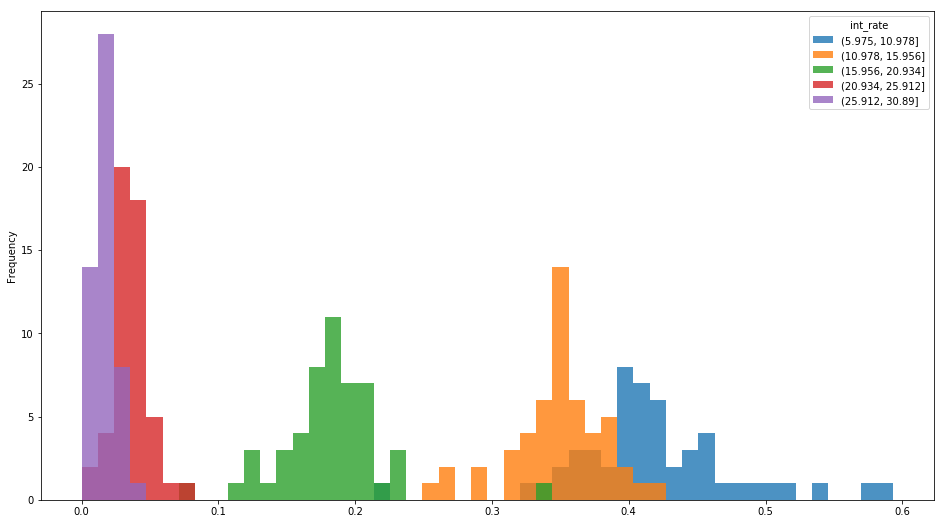

In [14]:
import matplotlib.pyplot as plt
# df.groupby('emp_title2').plot.bar(df['int_rate'])

int_bins = pd.cut(df['int_rate'], 5)

pd.crosstab(df['emp_title2'], int_bins, normalize = 'index').plot.hist(figsize = (16,9), alpha = 0.8, bins = 50)

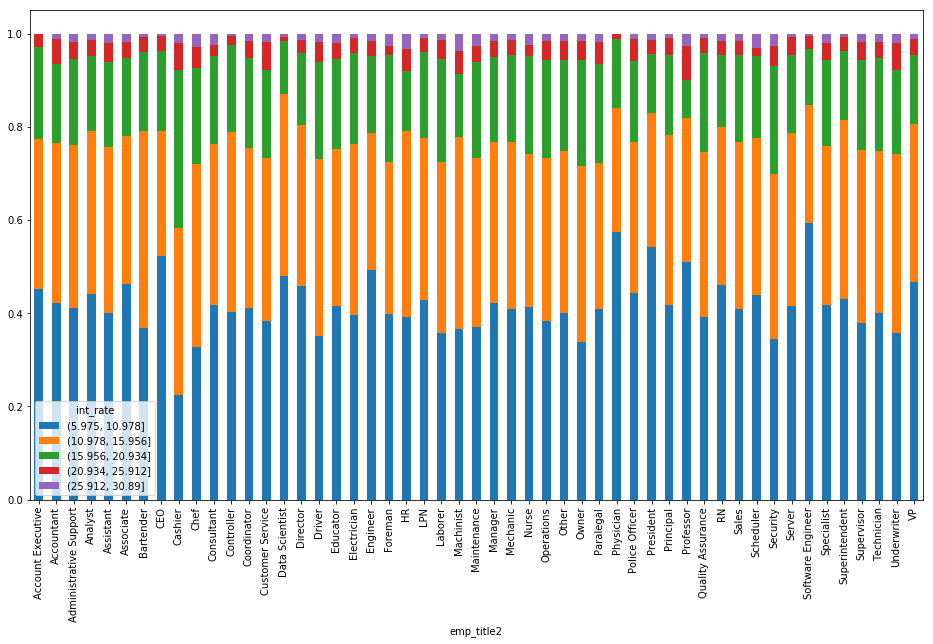

In [15]:
pd.crosstab(df['emp_title2'], int_bins, normalize = 'index').plot.bar(figsize = (16,9), stacked = True)

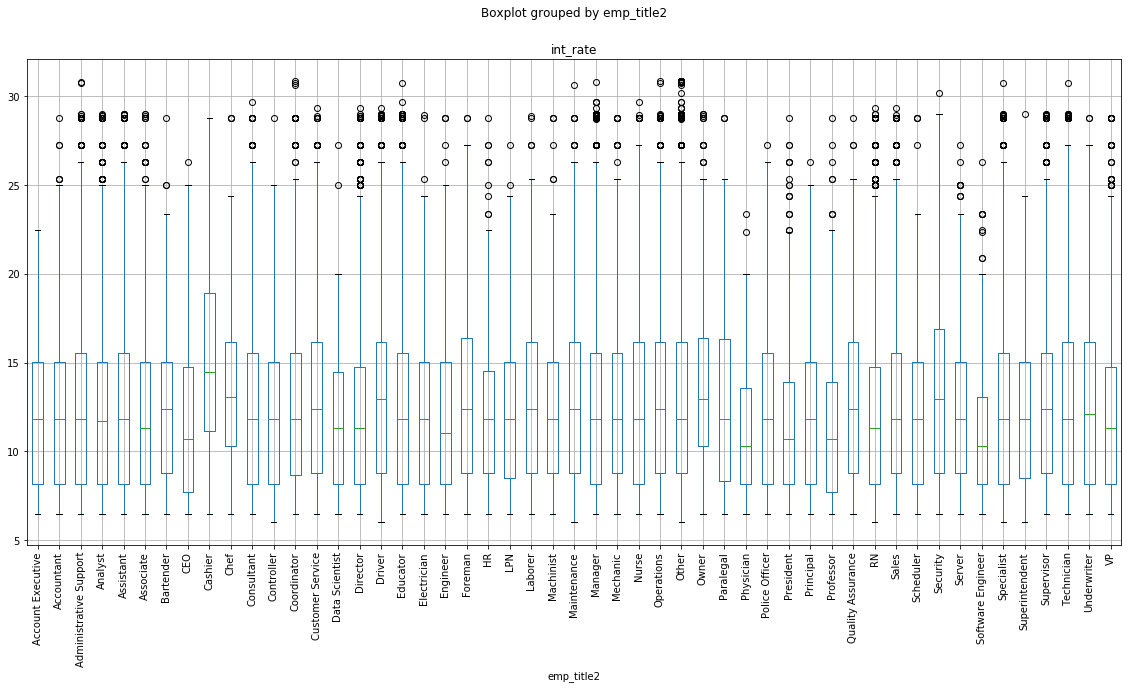

In [21]:
df.boxplot(column = 'int_rate', by = 'emp_title2', figsize= (19,9))
plt.xticks(rotation=90)
plt.show()

Cashiers are more likely to have a higer loan rate than all other groups

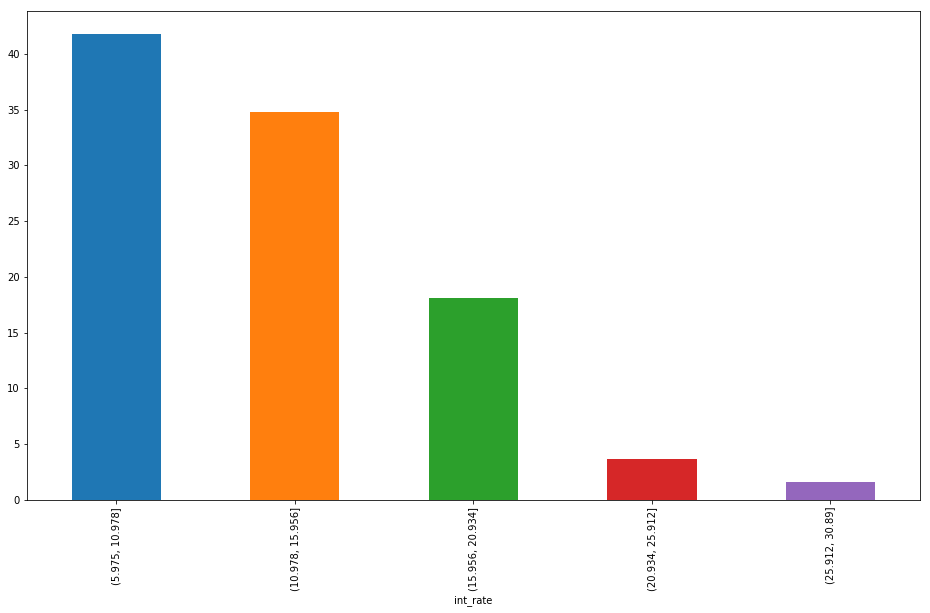

In [16]:
(pd.crosstab(df['emp_title2'],int_bins, normalize = 'index')*100).mean().plot.bar(figsize = (16,9))

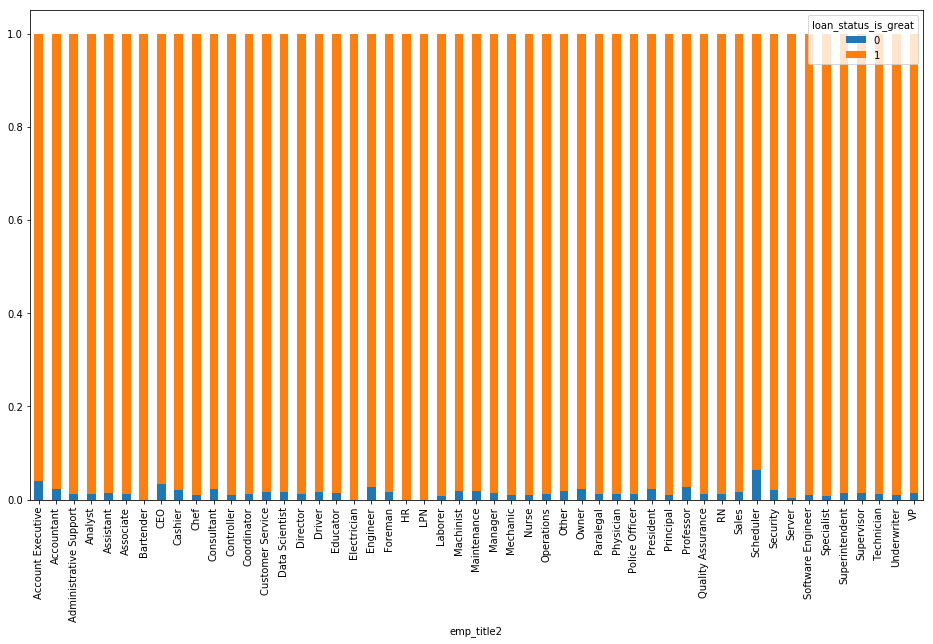

In [17]:
pd.crosstab(df['emp_title2'], df['loan_status_is_great'], normalize = 'index').plot.bar(figsize = (16,9), stacked = True)

Schedulers are late on their payments more than any other group of employee types! 

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01